# Wrangling Data: WeRateDogs

In this project we are going to gather, asses and clean data from the WeRateDogs Twitter account. Then we will analyze this data and present some insights and visualizations.

In [1]:
# import libraries
import pandas as pd
import requests
import os
import tweepy
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

## Gathering data

1) Read the file provided by Udacity that contains data from the tweets of WeRateDogs

In [2]:
data = pd.read_csv('twitter-archive-enhanced.csv')

2) Download programmatically the image file and read it

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('./image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [4]:
image_pred = pd.read_csv('image-predictions.tsv',sep='\t')

3) Query the Twitter API for each tweet's JSON data. Store in a file. read the file into a DataFrame

In [5]:
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# checking if works fine
tweet = api.get_status(892420643555336193)
print(tweet.text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [8]:
# works fine, lets gather the tweets ids from the data DataFrame
ids= data.tweet_id.values
print(len(ids))
fails = {}
check = 0
with open('./tweet_json.txt', 'w') as file:
    for tweet_id in ids:
        check += 1
        #print(check)
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError as error:
            fails[tweet_id] = error
            pass
print(fails)

2356
Rate limit reached. Sleeping for: 721
Rate limit reached. Sleeping for: 711
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status foun

In [5]:
extra = pd.read_json('tweet_json.txt', lines=True)

We already have all the information in three DataFrames: data, image_pred and extra. 

## Assesing data

In [6]:
data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
data.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [9]:
data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#all the denominators should be 10, lets take a look
data[data.rating_denominator != 10][['text','rating_denominator']]

,text,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,0
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the flo...,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7
784,"RT @dog_rates: After so many requests, this is...",11
902,Why does this never happen at my front door......,150
1068,"After so many requests, this is Bretagne. She ...",11
1120,Say hello to this unbelievably well behaved sq...,170
1165,Happy 4/20 from the squad! 13/10 for all https...,20
1202,This is Bluebert. He just saw that both #Final...,50


In [11]:
data.tweet_id.duplicated().sum()

0

In [12]:
data.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
Sadie             8
the               8
Toby              7
Daisy             7
Bailey            7
Buddy             7
an                7
Rusty             6
Dave              6
Milo              6
Scout             6
Bella             6
Oscar             6
Koda              6
Jax               6
Stanley           6
Leo               6
Jack              6
Phil              5
               ... 
Marvin            1
Fillup            1
Jerome            1
Bluebert          1
Dale              1
Crumpet           1
Henry             1
Brooks            1
unacceptable      1
Jeffrie           1
Pilot             1
Brandonald        1
Fiji              1
Beebop            1
Kenzie            1
Blanket           1
Berkeley          1
Boston            1
Anna              1


In [13]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2048,886983233522544640,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,2,Chihuahua,0.793469,True,toy_terrier,0.143528,True,can_opener,0.032253,False
1256,748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/74856...,1,Tibetan_terrier,0.328161,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
705,684940049151070208,https://pbs.twimg.com/media/CYFlVUFWwAAEsWX.jpg,2,Border_collie,0.665578,True,collie,0.176846,True,Old_English_sheepdog,0.065175,True


In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [17]:
image_pred.tweet_id.duplicated().sum()

0

In [18]:
extra.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
2326,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",99,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,NaN,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2327,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",274,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,NaN,NaN,NaN,NaN,133,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2328,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",114,False,Here is a very happy pup. Big fan of well-main...,NaN,...,NaN,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2329,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",121,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,NaN,NaN,NaN,NaN,43,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2330,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2446,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,NaN,NaN,NaN,NaN,469,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [19]:
extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [20]:
extra.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                        int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

In [21]:
extra.id.duplicated().sum()

0

### Quality issues

**Data table**
- 181 no original tweets (retweets) in table **check**
- tweet_id should be a string, not an int. The same for other id columns. **check**
- timestamp should be a datetime and not an object. The same for retweeted_status_timestamp. **check**
- innacurate rating_denominator values for 23 tweets. **check**
- rating_numerator has some really big numbers but there are no limit for the rating, needs further analysis.
- a lot of entries doesn't have a dog stage assigned. None used insteed of NaN. **check**
- wrong name assigments: a, an, the. None used insteed of NaN. **check**

**Image_pred table**
- no all the tweets in the data table have a image prediction. **check**
- tweet_id should be a string, not an int. **check**
- predictions that are not dogs: seat belt, web site, flamingo, minibus, fountain, limousine, among others. **check**
- inconsistency on the cases (lowercase, uppercase) in the predictions. **check**

**Extra table**
- tweet_id should be a string, not an int. **check**
- no all the tweets in the data table is in this table. **check**

### Tidiness issues
- The doggo, floofer, pupper, puppo columns should be only one column. **check**
- There should be two tables: one for the tweet values and other for the dog features. **check**
- Since the extra table has all the data from the tweet there are a lot of repeated information. **check**

## Cleaning data

In [22]:
data_clean = data.copy()
image_pred_clean = image_pred.copy()
extra_clean = extra.copy()

### Missing data

**Tweets from the data table with no information on the image_pred and extra tables**

**Define:**
We should keep only the tweets that have information in both tables. In order to do this in the most efficient way first we need to adress an other problem: the 181 retweets in the data table. We will remove this retweets and then proceed to leave only the records from the data table that have an image record. In order to do this, we inner merge this tables. Then we do the same with this new table and the extra table. We will end with one table with only the records that are in the three tables.

**Code:**

In [23]:
data_clean = data_clean[data_clean.retweeted_status_id.isnull()]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [24]:
# the retweeted columns don't have any information. We will drop them.
data_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [25]:
data_clean = data_clean.merge(image_pred_clean, how='inner',on='tweet_id')

In [26]:
data_clean = data_clean.merge(extra_clean, how='inner',left_on='tweet_id',right_on='id')

**Test:**

In [27]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 57 columns):
tweet_id                         1987 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1987 non-null object
source_x                         1987 non-null object
text                             1987 non-null object
expanded_urls                    1987 non-null object
rating_numerator                 1987 non-null int64
rating_denominator               1987 non-null int64
name                             1987 non-null object
doggo                            1987 non-null object
floofer                          1987 non-null object
pupper                           1987 non-null object
puppo                            1987 non-null object
jpg_url                          1987 non-null object
img_num                          1987 non-null int64
p1                               19

### Tidiness

**The doggo, floofer, pupper, puppo columns should be only one column.**

**Define:**
We should have only one column named dog state. In order to adress this problem, firts we need to convert all the None string to NaN. We have to adress an other issue: there are a lot of entries without an assigned dog state. According to the dogtionary, floof is a good state for any dog, so we will fill the unknown values with this state. Then we use the melt method to combine the four columns into two. This two columns have the same information so we can delete one. Then we drop the entries were dod state is empty. 

**Code:**

In [28]:
data_clean['doggo'].replace('None', np.nan, inplace=True)

In [29]:
data_clean['floofer'].replace('None', np.nan, inplace=True)

In [30]:
data_clean['pupper'].replace('None', np.nan, inplace=True)

In [31]:
data_clean['puppo'].replace('None', np.nan, inplace=True)

In [32]:
mask = data_clean.puppo.isnull() & data_clean.pupper.isnull() & data_clean.floofer.isnull() & data_clean.doggo.isnull()
data_clean.loc[mask,'floofer'] = 'floofer'

In [33]:
melt = ['doggo', 'floofer', 'pupper', 'puppo']
no_melt = [x for x in data_clean.columns.tolist() if x not in melt]
data_clean = pd.melt(data_clean, id_vars = no_melt, value_vars = melt, 
                         var_name = 'var', value_name = 'dog_stage')

In [34]:
data_clean.drop(['var'],axis=1, inplace=True)

In [35]:
data_clean.dropna(subset=['dog_stage'], inplace=True)

**Test:**

In [36]:
data_clean.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,NaN,NaN,NaN,6779,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo
37,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,...,NaN,NaN,NaN,2761,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo
81,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,...,NaN,NaN,NaN,5059,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo
88,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,...,NaN,NaN,NaN,3246,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo
97,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,...,NaN,NaN,NaN,2942,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo


**There should be two tables.**

**Define:**
We should have two tables: one for the tweet features like  timestamp, text, url, counts and another for the dog features like ranking, name, dog_stage,  breed. We also have a lot of repeated features that we will drop. We are also not interested in some columns.

**Code:**

In [69]:
tweets_clean = data_clean[['tweet_id','timestamp','source_x','text','expanded_urls','img_num','display_text_range','favorite_count','retweet_count']]

In [70]:
dogs_clean = data_clean[['tweet_id','rating_numerator','rating_denominator','name', 'jpg_url','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','dog_stage']]

**Test:**

In [39]:
tweets_clean.head(2)

,tweet_id,timestamp,source_x,text,expanded_urls,img_num,display_text_range,favorite_count,retweet_count
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,1,"[0, 133]",30216,6779
37,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,1,"[0, 140]",19327,2761


In [40]:
dogs_clean.sample(5)

,tweet_id,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
2854,727175381690781696,10,10,Karll,https://pbs.twimg.com/media/ChdyJvdWwAA5HGd.jpg,flat-coated_retriever,0.656463,True,Great_Dane,0.084766,True,Labrador_retriever,0.058909,True,floofer
2326,817415592588222464,11,10,Strudel,https://pbs.twimg.com/media/C1gLJVpWgAApI3r.jpg,Doberman,0.806163,True,black-and-tan_coonhound,0.097386,True,miniature_pinscher,0.085993,True,floofer
3277,684594889858887680,10,10,None,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,Weimaraner,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,0.003879,True,floofer
2551,774757898236878852,12,10,Finley,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True,floofer
3477,675820929667219457,11,10,None,https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg,basset,0.556373,True,beagle,0.201675,True,bloodhound,0.110848,True,floofer


### Quality

**Wrong datatype for some columns.**

**Define:**
We have to change the following datatypes using astype and to_datetime methods:

tweet_id: from int to string

timestamp: from string to datatime

**Code:**

In [72]:
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)
dogs_clean.tweet_id = dogs_clean.tweet_id.astype(str)
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test:**

In [42]:
tweets_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source_x                      object
text                          object
expanded_urls                 object
img_num                        int64
display_text_range            object
favorite_count                 int64
retweet_count                  int64
dtype: object

In [43]:
dogs_clean.dtypes

tweet_id               object
rating_numerator        int64
rating_denominator      int64
name                   object
jpg_url                object
p1                     object
p1_conf               float64
p1_dog                   bool
p2                     object
p2_conf               float64
p2_dog                   bool
p3                     object
p3_conf               float64
p3_dog                   bool
dog_stage              object
dtype: object

**Invalid names.**

**Define:**
We have two problems with the name column:
- None insteed of NaN
- Invalid names like a, an, the, among others

We will convert all of this entries to NaN using the convert method.

**Code:**

In [44]:
dogs_clean['name'].replace('None', np.nan, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [45]:
dogs_clean.name.sort_values()[1340:1420]

2833           Ziva
4682            Zoe
2079           Zoey
1995           Zoey
3765           Zoey
2107          Zooey
5492           Zuzu
2455              a
2900              a
3508              a
3752              a
3740              a
3813              a
3378              a
3507              a
3749              a
3770              a
3580              a
3484              a
2910              a
3483              a
3566              a
3776              a
3421              a
3549              a
3784              a
2729              a
3970              a
3045              a
3870              a
           ...     
5013              a
3619              a
3820              a
4751              a
2738              a
2727              a
3906              a
3876              a
3883              a
3843              a
3839              a
3833              a
3337       actually
4834            all
3951             an
3967             an
2743             an
3046             an
3826             an


In [46]:
no_name = ['a','an','the','officially','one','very','just','unacceptable','this','such','space','quite','my','not','getting','his','incredibly','infuriating','light','actually','all','by']
dogs_clean['name'].replace(no_name, np.nan, inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


**Test:**

In [47]:
dogs_clean.name.sort_values()[1340:1350]

2833     Ziva
4682      Zoe
2079     Zoey
1995     Zoey
3765     Zoey
2107    Zooey
5492     Zuzu
81        NaN
136       NaN
147       NaN
Name: name, dtype: object

**Innacurate rating_denominators.**

**Define:**
All the denominators should be 10 but there are some entries with another values. Since they are a little few we can delete them.

**Code:**

In [48]:
dogs_clean = dogs_clean[dogs_clean.rating_denominator == 10]

**Test:**

In [49]:
dogs_clean.rating_denominator.value_counts()

10    1980
Name: rating_denominator, dtype: int64

**Inadequate breed predictions**

**Define:**
There are some breed predictions that are not even dogs. We have to adress this issue. First lets check if there are some entries in which any of the three predictions are dogs. Since in this cases we don't have any information on the dog's breed we should delate this entries. We also need to convert all entries to lowercase to avoid some possible problems.

**Code:**

In [50]:
no_dog = (dogs_clean.p1_dog == False) & (dogs_clean.p2_dog == False) & (dogs_clean.p3_dog == False)

In [51]:
dogs_clean[no_dog].tweet_id.count()

308

In [52]:
dog = ~((dogs_clean.p1_dog == False) & (dogs_clean.p2_dog == False) & (dogs_clean.p3_dog == False))

In [53]:
dogs_clean=dogs_clean[dog]

In [54]:
dogs_clean.p1 = dogs_clean.p1.str.lower()
dogs_clean.p2 = dogs_clean.p2.str.lower()
dogs_clean.p3 = dogs_clean.p3.str.lower()

**Test**:

In [55]:
dogs_clean.p1.value_counts()

golden_retriever             139
labrador_retriever            91
pembroke                      88
chihuahua                     79
pug                           54
chow                          41
samoyed                       39
pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
french_bulldog                25
chesapeake_bay_retriever      23
miniature_pinscher            22
seat_belt                     20
german_shepherd               20
siberian_husky                19
shetland_sheepdog             18
staffordshire_bullterrier     18
eskimo_dog                    18
shih-tzu                      17
beagle                        17
cardigan                      17
maltese_dog                   17
rottweiler                    17
kuvasz                        16
italian_greyhound             16
lakeland_terrier              16
dalmatian                     14
pekinese                      13
          

## Store the datasets

In [56]:
dogs_clean.to_csv('twitter_archive_master.csv')
tweets_clean.to_csv('twitter_archive_tweetdetails.csv')

## Some insights

**Correlation between favorite_count and retweet_count**

In [57]:
tweets_clean.corr()

,img_num,favorite_count,retweet_count
img_num,1.000000,0.127468,0.101865
favorite_count,0.127468,1.000000,0.929788
retweet_count,0.101865,0.929788,1.000000


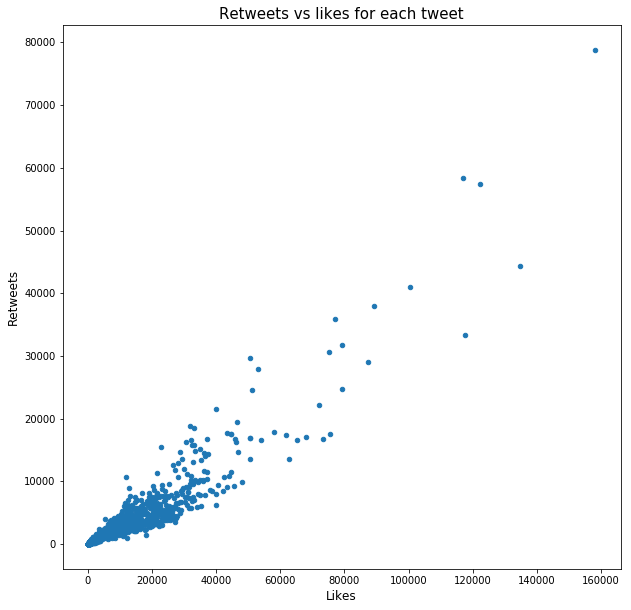

In [58]:
tweets_clean.plot(x='favorite_count',y='retweet_count',kind='scatter',figsize=(10,10))
plt.title('Retweets vs likes for each tweet',fontsize=15)
plt.xlabel('Likes',fontsize=12)
plt.ylabel('Retweets',fontsize=12);

As we can imagine, there is a strong correlation between how many likes a tweet have and how many time have been retweeted.

**Most popular tweet and dog**

In [59]:
tweets_clean[tweets_clean.favorite_count == tweets_clean.favorite_count.max()]

,tweet_id,timestamp,source_x,text,expanded_urls,img_num,display_text_range,favorite_count,retweet_count
769,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,1,"[0, 91]",158170,78810


In [60]:
tweets_clean[tweets_clean.favorite_count == tweets_clean.favorite_count.max()].text

769    Here's a doggo realizing you can stand in a po...
Name: text, dtype: object

In [61]:
tweets_clean[tweets_clean.favorite_count == tweets_clean.favorite_count.max()].expanded_urls

769    https://twitter.com/dog_rates/status/744234799...
Name: expanded_urls, dtype: object

In [75]:
id_fav='744234799360020481'
dogs_clean[dogs_clean.tweet_id == id_fav].p1

769    Labrador_retriever
Name: p1, dtype: object

The most popular tweet is about a Labrador Retriever

**Mean rating for each dog_stage**

In [179]:
dogs_clean.groupby('dog_stage').rating_numerator.mean()

dog_stage
doggo      11.809524
floofer    10.819277
pupper     10.965909
puppo      12.000000
Name: rating_numerator, dtype: float64

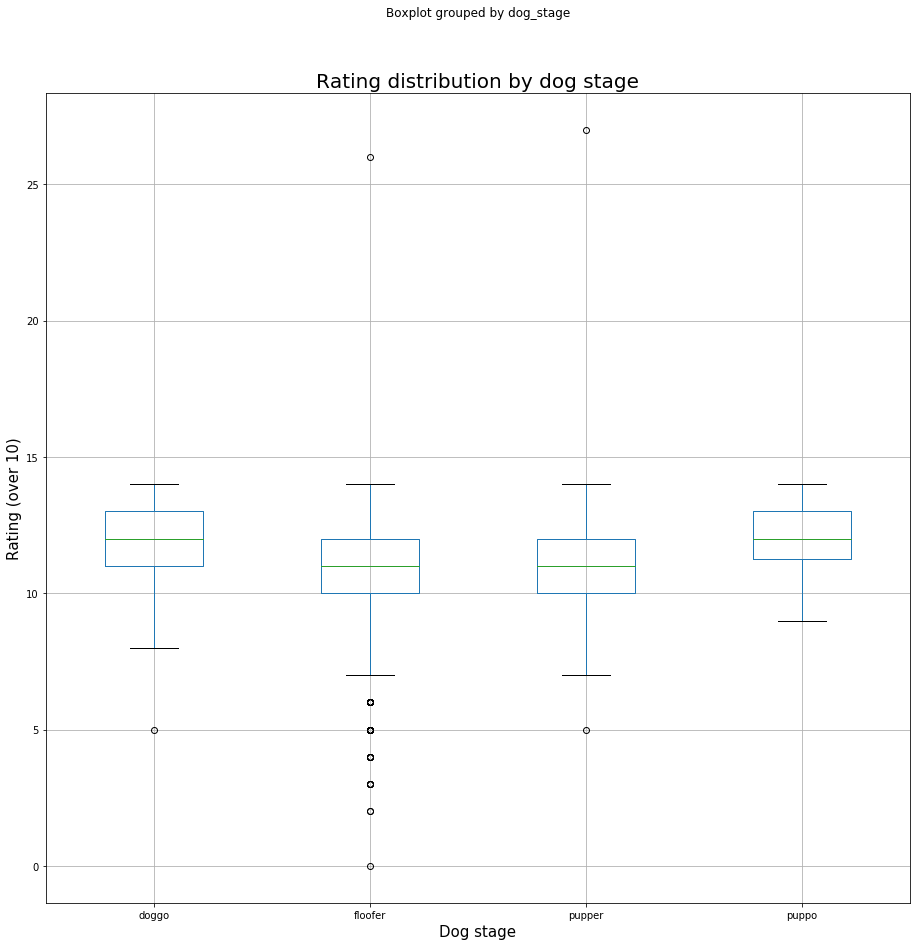

In [242]:
dogs_clean[dogs_clean.rating_numerator <=30].boxplot(column=['rating_numerator'], by='dog_stage',figsize=(15,15))
plt.title('Rating distribution by dog stage',fontsize=20)
plt.xlabel('Dog stage',fontsize=15)
plt.ylabel('Rating (over 10)',fontsize=15);

Puppo and doggo rates better than the others, but is not a significative difference.

**Popular breeds**

In [202]:
dogs_clean.p1.value_counts().head(15)

golden_retriever            139
labrador_retriever           91
pembroke                     88
chihuahua                    79
pug                          54
chow                         41
samoyed                      39
pomeranian                   38
toy_poodle                   37
malamute                     29
cocker_spaniel               27
french_bulldog               25
chesapeake_bay_retriever     23
miniature_pinscher           22
german_shepherd              20
Name: p1, dtype: int64

Text(0.5,1,'Popular breeds')

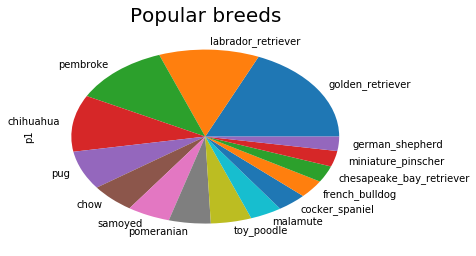

In [243]:
dogs_clean.p1.value_counts().head(15).plot.pie()
plt.title('Popular breeds',fontsize=20)

The retrievers are the most popular breeds.